# Interpolation

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor dem Präsenzunterricht durchgearbeitet werden. Hier lernst zwei einfache Verfahren zur Interpolation von Funktionswerten zwischen bekannten Funktionswerten kennen. Das Ziel ist, deren Funktionsweise kennenzulernen, indem du sie selbst rudimentär implementierst. Details und Verfeinerungen besprechen wir im Präsenzunterricht.

### Interpolation mit Polynomen

Studiere die Kapitel 1 und 2 - 2.2.1 des Buchs ["Interpolation von Daten und Funktionen" - G. Walz, 2020](https://link.springer.com/book/10.1007/978-3-658-30658-8). (Das PDF des Buchs kann heruntergeladen werden, wenn man im WLAN der ZHAW oder per VPN verbunden ist.)

Desweiteren ist eine Repetion zum Thema lineare Gleichungssysteme sinnvoll. Hierfür sind folgende Videos praktisch:

- ["Lineare Gleichungssysteme lösen" - Mathe - simpleclub](https://www.youtube.com/watch?v=OVA_Vlnus6I)
- ["Lineare Gleichungssysteme (LGS) Einfach erklärt!" - MathePeter](https://www.youtube.com/watch?v=MrTBvdYh8kU)

Die Unterlagen aus dem ersten Semester, Lineare Algebra, können hier natürlich auch weiterhelfen.

### Lineare Interpolation

Studiere als Einstieg dieses Video: ["Lineare Interpolation, Herleitung, Formel" - Mathe by Daniel Jung](https://www.youtube.com/watch?v=KYiIGZYrb9M).

## Arbeitsauftrag

In [2]:
import numpy as np
import matplotlib.pyplot as plt


**np.allclose(np.dot(A,a),c) Korrigiert gibt ``True`` zurück**


**linalg.solve löst die gleichung (A,a = c)**
**um a zu lösen muss man die Inverse gerechnet**






### Aufgabe 1

Nenne ein paar Beispiele, wofür die Interpolation gebraucht wird.

- Schätzen von fehlenden Datenpunkten in Messreihen
- Grafische Darstellung von Funktionen
- Computergraphik in Games, etc.

### Aufgabe 2

Bestimme mithilfe eines linearen Gleichungssystems ein Polynom, das die folgenden Punkte interpoliert.

$$ (-1, 4),\ (0, -1),\ (3, 5) $$

Löse das Gleichungssystem von Hand, mit [Wolfram|Alpha](https://www.wolframalpha.com/) oder mit NumPy.

**`FRAGE:von wo weiss man, dass man hier ein np.array braucht?`**


In [13]:
A = np.array(
    [
        [1, -1, 1],
        [1, 0, 0],
        [1, 3, 9],
    ]
)
c = np.array([4, -1, 5])
a = np.linalg.inv(A).dot(c)
a


array([-1.  , -3.25,  1.75])

**Überprüft ob das Array richtig ist**

In [4]:
result = np.dot(A, a)
if np.allclose(result, c):
    print("The solution is correct.")
else:
    print("The solution is wrong.")


The solution is correct.


### Aufgabe 3

- Stelle das Polynom mit Matplotlib im Bereich $x\in[-4,4]$ dar (blaue Linie).
- Trage auch die in Aufgabe 2 gegeben Punkte in den Plot ein (rote Punkte). Die $x$- und $y$-Werte der Punkte sind hier als Arrays `px` und `py` bereits vordefiniert (aufsteigend nach den $x$-Werten sortiert).

In [25]:
# Creating two arrays, one with the values -1, 0, 3 and the other with the values 4, -1, 5.
px = np.array([-1, 0, 3])
py = np.array([4, -1, 5])


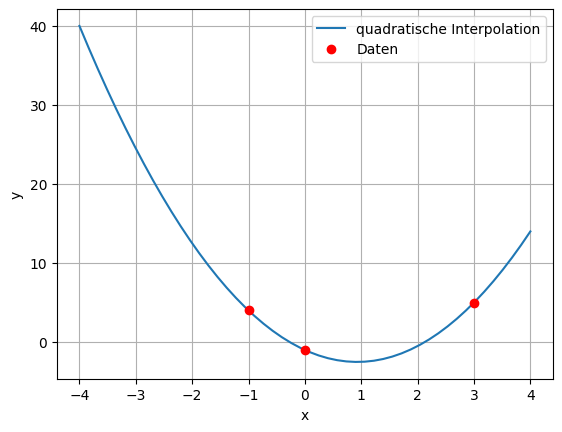

In [18]:
# Aufgabe 3
a = (-1, -3.25, 1.75)  # gelöste Punkte vom Array
x = np.linspace(-4, 4)

# Formel um die Kurve zu berechnen
y = np.sum(np.array([ak * x**k for k, ak in enumerate(a)]), axis=0)
## wo finde ich die formel?

plt.plot(x, y, label="quadratische Interpolation")
plt.plot(px, py, "ro", label="Daten")  # berechnete Punkte
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


### Aufgabe 4

**lineare interpolation wird verlangt lese die Aufgabe**

Bestimme den $y$-Wert für $x_0 = 2.5$ aus den in Aufgabe 2 gegeben Punkten mithilfe der **linearen Interpolation**.

*Tipp:* Bestimme zurst die Position (Index `i`), an der `x0` im Array `px` einzuordnen wäre. Dann benutze diese, um zwischen den benachbarten Punkten zu interpolieren.

In [20]:
# vom unterricht
x0 = 2.5
i = 0
while px[i] < x0:
    i += 1
px, i


(array([-1,  0,  3]), 2)

In [21]:
# Aufgabe 4
# Finding the y-value of the point on the line
# that is closest to the point (x0, y0).

x0 = 2.5

# xi ist der punkt nach dem x0 
for idx, xi in enumerate(px):
    if x0 < xi:
        break

# Formel um die Steigung des Punktes zu finden 
m = (py[idx] - py[idx - 1]) / (px[idx] - px[idx - 1])
y0 = m * (x0 - px[idx]) + py[idx]

print(f"(x0, y0) = ({x0}, {y0})")


(x0, y0) = (2.5, 4.0)


### Aufgabe 5

Füge den in Aufgabe 4 gefundenen Punkt in einer anderen Farbe in das Diagramm aus Aufgabe 3 ein.

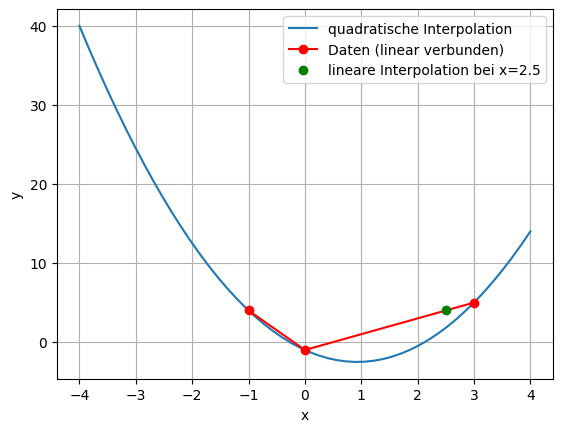

In [22]:
# Aufgabe 5
plt.plot(x, y, label="quadratische Interpolation")
plt.plot(px, py, "r-o", label="Daten (linear verbunden)")
plt.plot(x0, y0, "go", label=f"lineare Interpolation bei x={x0}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

### Aufgabe 6 (Optional)

Verallgemeinere das Vorgehen aus Aufgabe 5 in eine Funktion namens `interpolate_linear(px, py, x)`. 

- *Input:* Zwei Arrays `px` und `py` mit den $x$-$y$-Werten der gegebenen Punkte (Daten) und ein Array `x` mit den $x$-Werten, deren linear interpolierte $y$-Werte gesucht sind.
- *Output:* Ein Array `y` mit den interpolierten Funktionswerten.

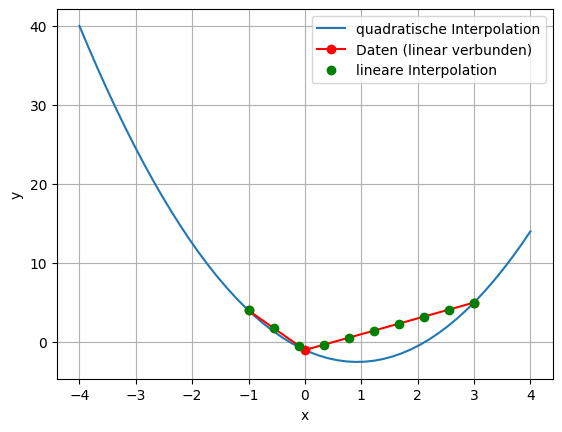

In [23]:
# Aufgabe 6
def find_idx(px, x0):
    if x0 <= px.min():
        return 1
    elif x0 > px.max():
        return len(px) - 1
    else:
        for i, xi in enumerate(px):
            if x0 < xi:
                break
        return i


def interpolate_linear(px, py, x):
    idx = np.array([find_idx(px, x0) for x0 in x])
    idx_1 = idx - 1
    m = (py[idx] - py[idx_1]) / (px[idx] - px[idx_1])
    return m * (x - px[idx]) + py[idx]


x0 = np.linspace(px.min(), px.max(), 10)
y0 = interpolate_linear(px, py, x0)

plt.plot(x, y, label="quadratische Interpolation")
plt.plot(px, py, "r-o", label="Daten (linear verbunden)")
plt.plot(x0, y0, "go", label=f"lineare Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [28]:
# Anderer lösungsansatz mit ``np.searchsorted`
def interpolate_linear(px, py, x0):
    idx = px.searchsorted(x0)
    x1, x2 = px[idx - 1], px[idx]
    y1, y2 = py[idx - 1], py[idx]
    return y1 + (y2 - y1) * ((x0 - x1) / (x2 - x1))


x0 = 2.5
y0 = interpolate_linear(px, py, x0)
print(y0)


4.0
